In [2]:
import numpy as np
import pprint
import matplotlib.pyplot as plt

from PIL import Image
from deepface import DeepFace as df

In [3]:
# Путь к изображению
image_path = 'resources/Captain.png'

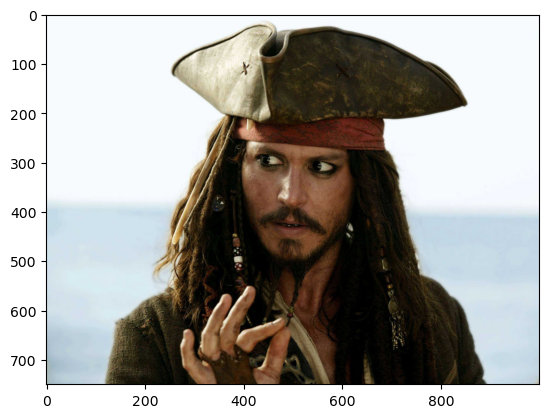

In [4]:
# Подгружаем изображение
image = np.asarray(Image.open(image_path), dtype='uint8')

plt.imshow(image)

In [6]:
# Получаем все лица с фотографии
all_faces = df.extract_faces(img_path=image, detector_backend='retinaface')
print(f'Количество обнаруженных лиц: {len(all_faces)}')

face = all_faces[0]['face']
print(f'Тип коллекции face: {type(face)}, тип данных: {face.dtype}')

print(f'shape\'ы первоначальной фотографии: {image.shape}, скорректированной: {face.shape}')

Количество обнаруженных лиц: 1
Тип коллекции face: <class 'numpy.ndarray'>, тип данных: float32
shape'ы первоначальной фотографии: (750, 1000, 3), скорректированной: (224, 224, 3)


Text(0.5, 1.0, 'uint')

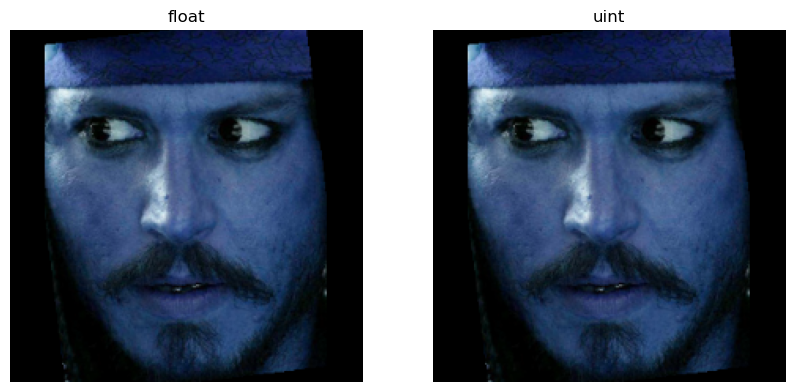

In [7]:
fig = plt.figure(figsize=(10, 7))

# Тип float32
fig.add_subplot(1, 2, 1)
plt.imshow(face)
plt.axis('off')
plt.title('float')

# Переводим в целочисленное представление
face *= 255
face = face.astype('uint8')

# Тип uint8
fig.add_subplot(1, 2, 2)
plt.imshow(face)
plt.axis('off')
plt.title('uint')

In [8]:
# Анализируем первоначальное (большое) изображение
analyze = df.analyze(image, detector_backend='retinaface')
pprint.pprint(analyze)

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]   

[{'age': 37,
  'dominant_emotion': 'neutral',
  'dominant_gender': 'Man',
  'dominant_race': 'latino hispanic',
  'emotion': {'angry': 2.292788587510586,
              'disgust': 2.484864864982228e-05,
              'fear': 0.3951757214963436,
              'happy': 0.00152026168507291,
              'neutral': 96.56725525856018,
              'sad': 0.7432259619235992,
              'surprise': 6.8826203403205e-06},
  'gender': {'Man': 99.92361068725586, 'Woman': 0.07638864335604012},
  'race': {'asian': 3.658481314778328,
           'black': 7.017043232917786,
           'indian': 21.183879673480988,
           'latino hispanic': 28.907257318496704,
           'middle eastern': 21.693339943885803,
           'white': 17.54000186920166},
  'region': {'h': 282, 'w': 226, 'x': 394, 'y': 222}}]


In [9]:
# Убедимся, что тип целочисленный
face.dtype

dtype('uint8')

In [10]:
# Анализируем скорректированное изображение
analyze_face = df.analyze(face, detector_backend='retinaface', enforce_detection=False)
pprint.pprint(analyze_face)

Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]  

[{'age': 37,
  'dominant_emotion': 'neutral',
  'dominant_gender': 'Man',
  'dominant_race': 'white',
  'emotion': {'angry': 2.706349827349186,
              'disgust': 6.719623684148246e-05,
              'fear': 1.7431138083338737,
              'happy': 0.0154940877109766,
              'neutral': 94.4878339767456,
              'sad': 1.047058030962944,
              'surprise': 8.230652497331903e-05},
  'gender': {'Man': 99.63045120239258, 'Woman': 0.3695443272590637},
  'race': {'asian': 3.448230734678419,
           'black': 7.283834989805819,
           'indian': 14.014705835019846,
           'latino hispanic': 21.91018648026151,
           'middle eastern': 26.654276054587836,
           'white': 26.688760317711793},
  'region': {'h': 224, 'w': 224, 'x': 0, 'y': 0}}]
